In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
print(train.shape)
print(test.shape)


(27455, 785)
(7172, 785)


In [4]:
train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
##get our traing labels
labels=train['label'].values

In [6]:
###view the unique labels
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

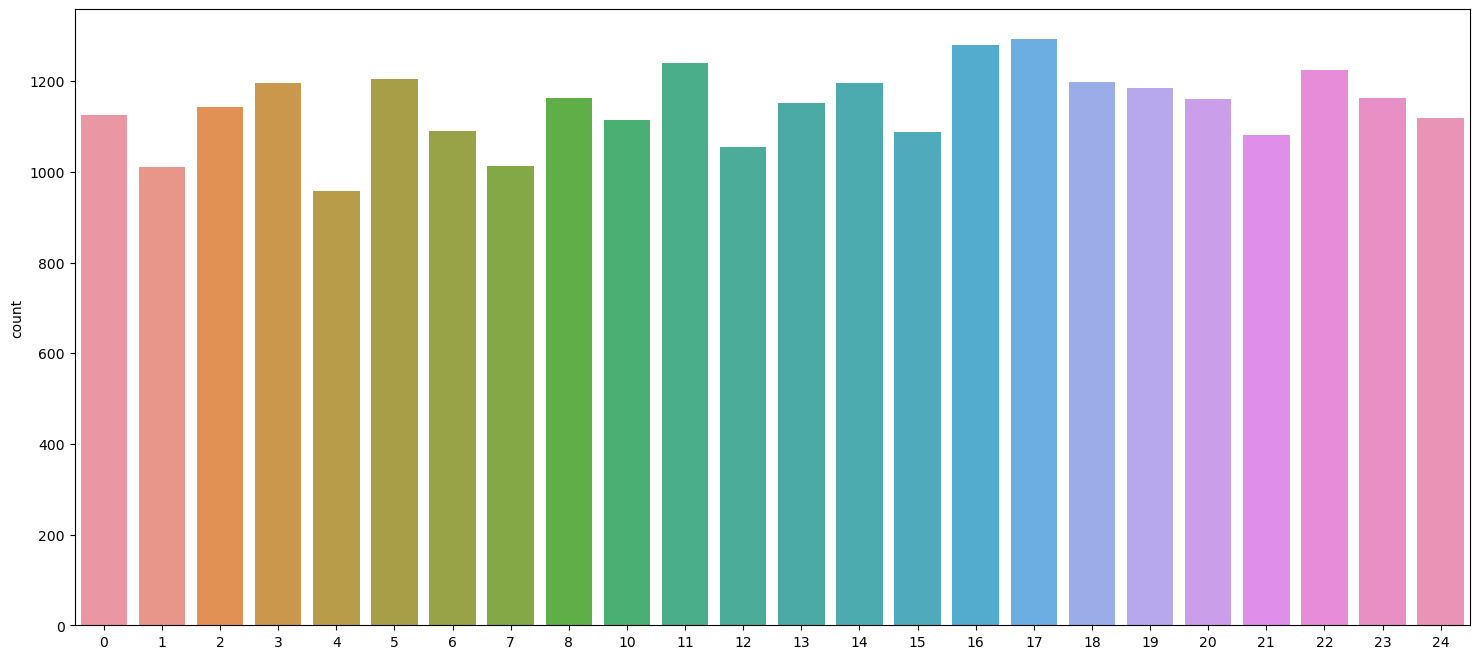

In [39]:
####plot the quantities in each class
import seaborn as sns
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [8]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [9]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 
               'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [10]:
###Drop training labels from our training data so we can seperate it
train.drop('label',inplace=True,axis=1)

In [11]:
###Extract the image data from each row in our csv
images=train.values
images=np.array([np.reshape(i,(28,28))for i in images])
images=np.array([i.flatten() for i in images])

16


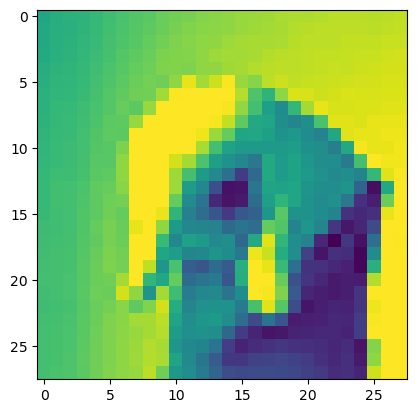

In [12]:
#inspect on image
index=5
print(labels[index])

plt.imshow(images[index].reshape(28,28))

In [18]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

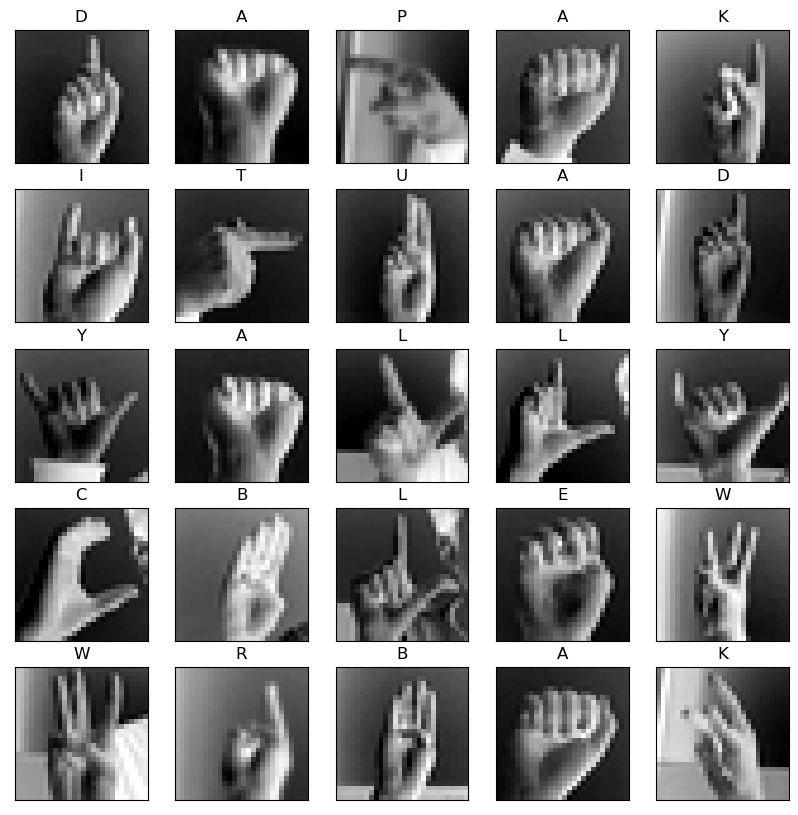

In [20]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()


In [21]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


In [23]:
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

#CNN Model Summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [24]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [25]:
###Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 10, 
                        verbose = 1, validation_data = (X_validate, y_validate))


Epoch 1/10
43/43 [==============================] - 16s 349ms/step - loss: 3.1649 - accuracy: 0.0604 - val_loss: 3.0303 - val_accuracy: 0.1570
Epoch 2/10
43/43 [==============================] - 15s 338ms/step - loss: 2.5761 - accuracy: 0.1968 - val_loss: 2.0167 - val_accuracy: 0.3806
Epoch 3/10
43/43 [==============================] - 17s 389ms/step - loss: 1.8628 - accuracy: 0.3856 - val_loss: 1.3719 - val_accuracy: 0.5993
Epoch 4/10
43/43 [==============================] - 15s 356ms/step - loss: 1.3753 - accuracy: 0.5314 - val_loss: 0.9705 - val_accuracy: 0.7021
Epoch 5/10
43/43 [==============================] - 16s 379ms/step - loss: 1.0627 - accuracy: 0.6350 - val_loss: 0.7163 - val_accuracy: 0.7802
Epoch 6/10
43/43 [==============================] - 19s 431ms/step - loss: 0.8677 - accuracy: 0.6976 - val_loss: 0.5285 - val_accuracy: 0.8529
Epoch 7/10
43/43 [==============================] - 15s 345ms/step - loss: 0.7191 - accuracy: 0.7501 - val_loss: 0.4086 - val_accuracy: 0.8875

In [28]:
###accuracy
from sklearn.metrics import accuracy_score

predictions=np.argmax(cnn_model.predict(X_test),axis=-1)
accuracy_score(y_test,predictions)

225/225 [==============================] - 1s 6ms/step


0.852760736196319

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,predictions)
conf

array([[310,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,  17,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 404,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  28,   0,   0],
       [  0,   0, 289,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 19,   0,   0, 207,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  14,   0,   0,   0,   0,   0,   5,   0],
       [  0,   0,   0,   0, 497,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 247,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 287,  16,   0,   0,   0,   0,   0,
          0,   0,   5,   0,   0,  40,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  20

<AxesSubplot:>

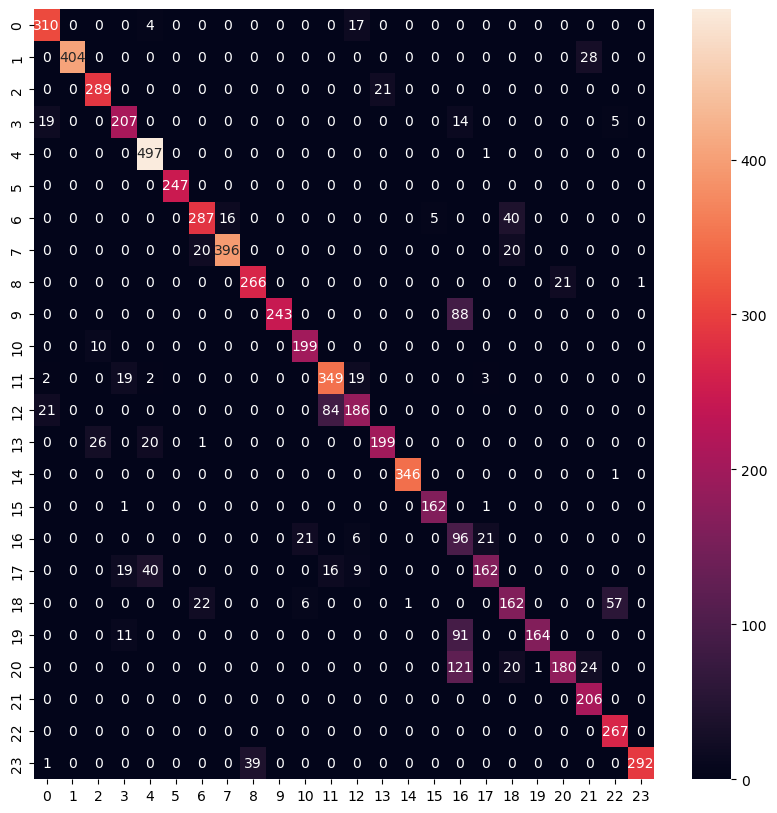

In [37]:
import seaborn as sns
plt.figure(figsize=(10,10))

sns.heatmap(conf,annot=True,fmt='d')

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       331
         1.0       1.00      0.94      0.97       432
         2.0       0.89      0.93      0.91       310
         3.0       0.81      0.84      0.82       245
         4.0       0.88      1.00      0.94       498
         5.0       1.00      1.00      1.00       247
         6.0       0.87      0.82      0.85       348
         7.0       0.96      0.91      0.93       436
         8.0       0.87      0.92      0.90       288
        10.0       1.00      0.73      0.85       331
        11.0       0.88      0.95      0.91       209
        12.0       0.78      0.89      0.83       394
        13.0       0.78      0.64      0.70       291
        14.0       0.90      0.81      0.85       246
        15.0       1.00      1.00      1.00       347
        16.0       0.97      0.99      0.98       164
        17.0       0.23      0.67      0.35       144
        18.0       0.86    

Text(0.5, 1.0, 'Accuracy Evaluation')

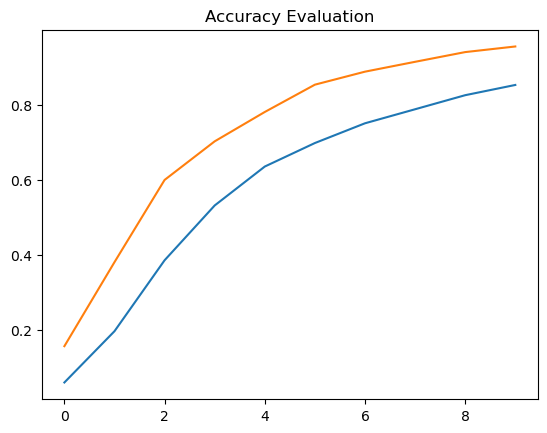

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Evaluation")

Text(0.5, 1.0, 'Evaluation of loss')

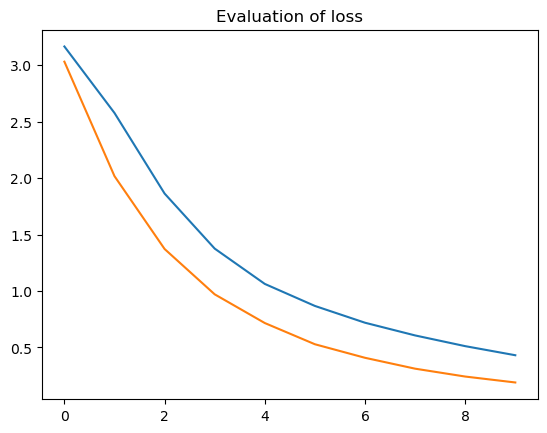

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Evaluation of loss')

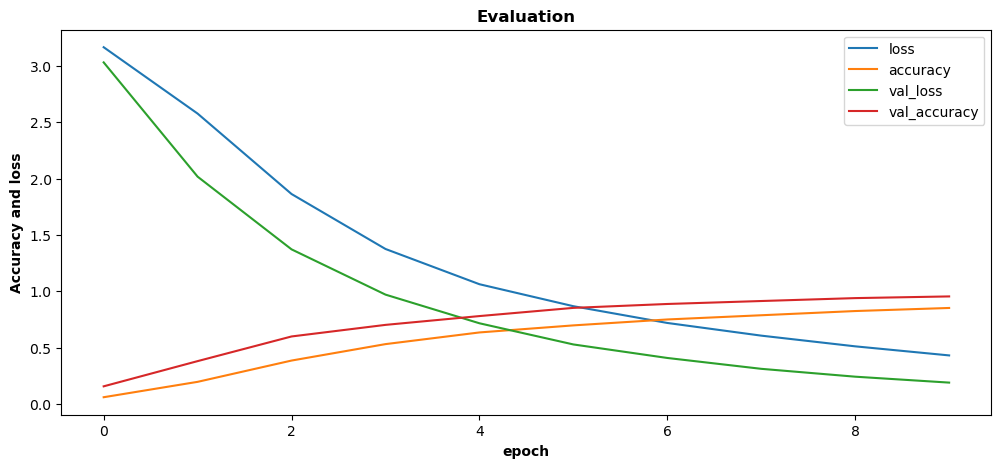

In [34]:
pd.DataFrame(history.history).plot(figsize=(12,5))
plt.title('Evaluation',fontweight='bold')
plt.xlabel('epoch',fontweight='bold')
plt.ylabel('Accuracy and loss',fontweight='bold')
plt.show()